In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation
from matplotlib.animation import FuncAnimation, PillowWriter
import os
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D


from kalman_utils_3D import *
from model_evaluation_3D import plot_residuals

from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from scipy.linalg import block_diag
from filterpy.stats import plot_covariance_ellipse
from filterpy.common import Saver

In [2]:
traj = Trajectoy3DGenerattion(sigma=0.5)

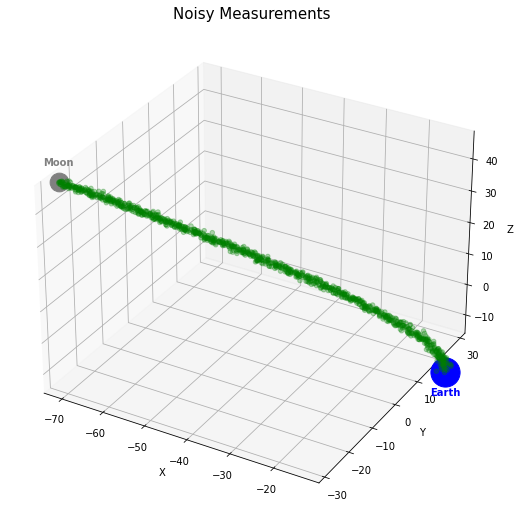

In [3]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

plot_measurements_3D(traj, ax, title="Noisy Measurements")

In [4]:
def get_filename_from_ax(ax):
    title = ax.get_title().split(" ")
    s = ""
    for i,f in enumerate(title):
        if i < len(title)-1 and i > 0:
            s+="_"+f
        else:
            s+=f
    if '-' in s:
        s = s.replace("-","_")
    if '=' in s:
        s = s.replace("=","_")
    return s

In [5]:
tracker = Ship_tracker(traj)
preds, cov = run(tracker, traj)

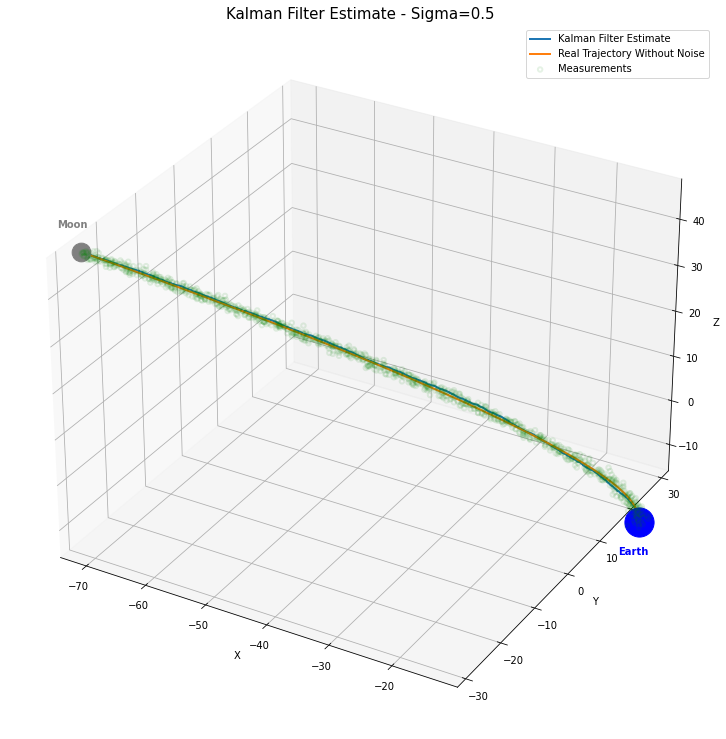

In [6]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds, traj, ax)
filename = get_filename_from_ax(ax)

fig.savefig(os.path.join("Plots", filename+".png"))


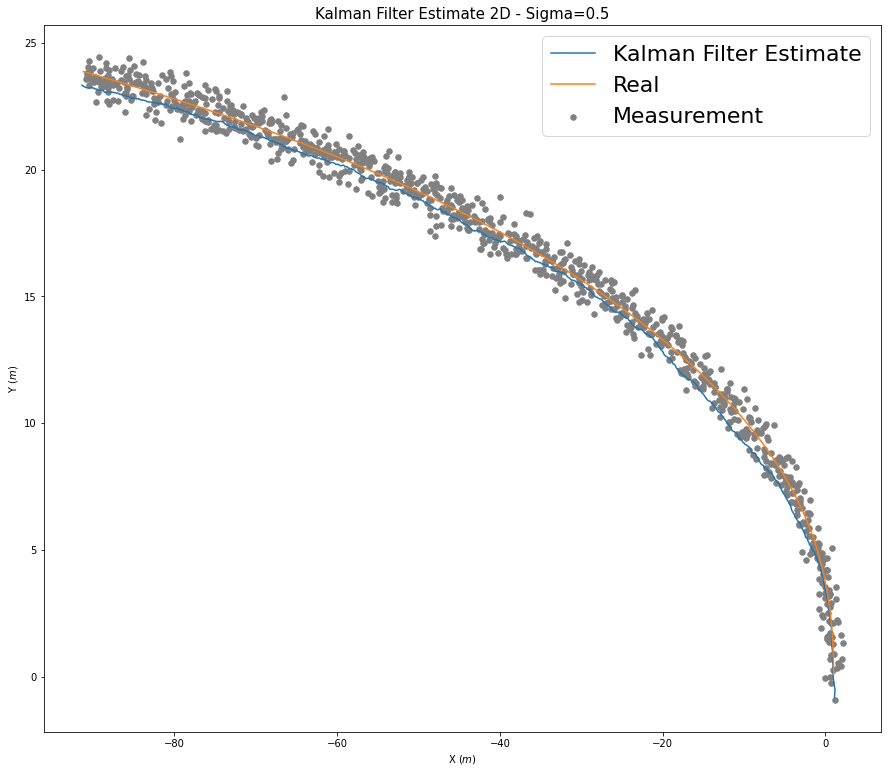

In [7]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
plot_x_z_2D(ax,traj, preds)

filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

Experimens

In [8]:
tracker_2 = Ship_tracker(traj)
preds_2, cov_2 = run_half_measures(tracker_2, traj)

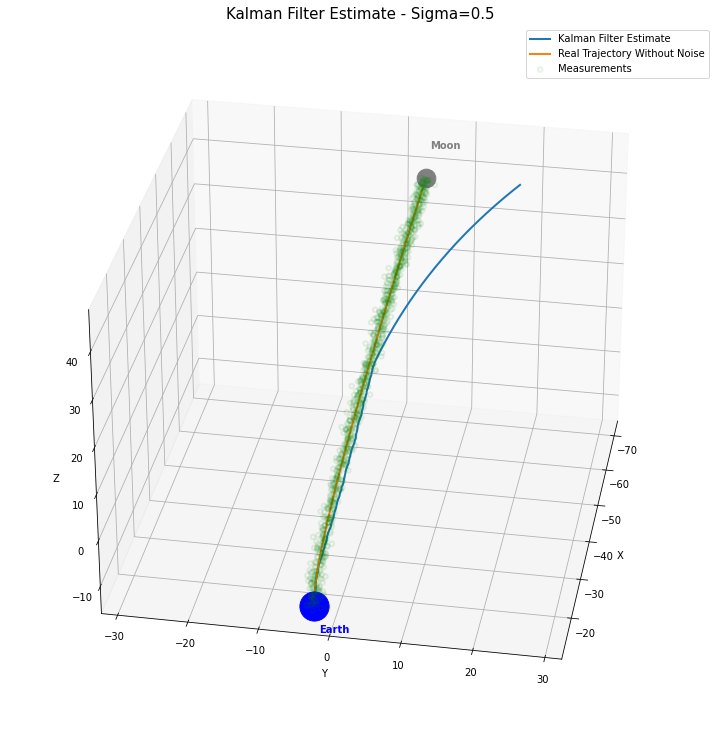

In [9]:
fig = plt.figure(figsize=(16,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds_2, traj, ax)
ax.view_init(azim=10)
filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+"_half_measures.png"))

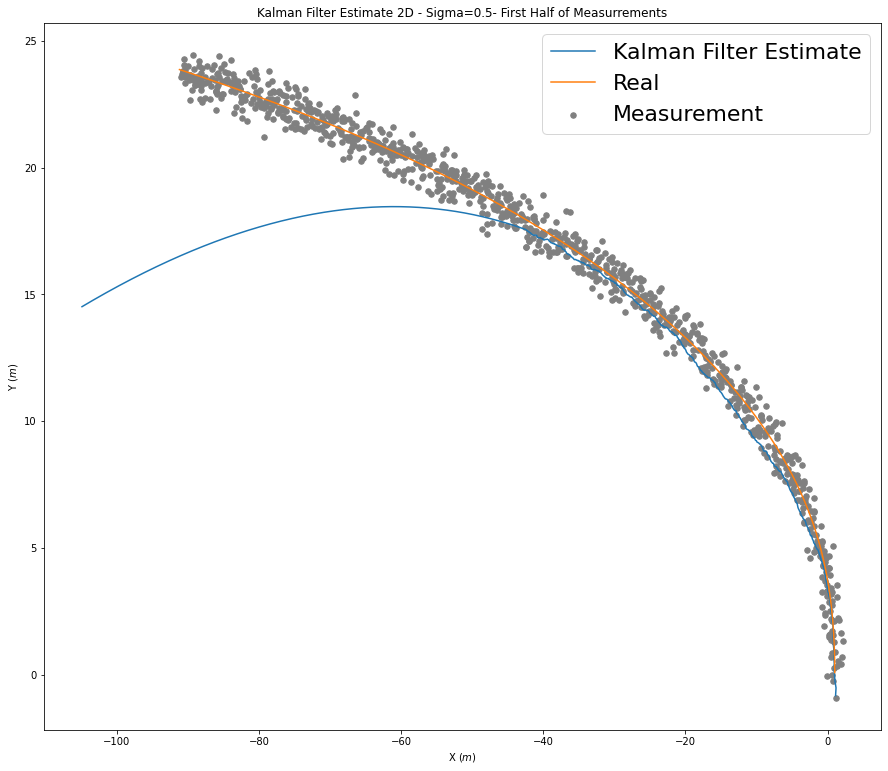

In [10]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
plot_x_z_2D(ax,traj, preds_2)
ax.set_title(ax.get_title()+"- First Half of-Measurements")

filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+"_half_measures.png"))